# [[공빅데] matplotlib으로 그래프 만들기- 다변량그래프, 밀집도그래프, 육각그래프](https://cafe.naver.com/21pbds)

### step1. 다변량 그래프 그리기

다변량 그래프: 변수가 여러 개 있는 그래프

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

In [8]:
#데이터 셋 불러오기
df = pd.read_csv('pydata/marketing_campaign.csv',sep='\t')

# null값 0으로 교체
df = df.fillna(0)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [10]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [11]:
# 학력 부분 숫자로 바꾸기
def recode_deu(education_level):
    if education_level == 'Basic':
        return 0
    if education_level == 'Graduation':
        return 1
    if education_level == '2n Cycle':
        return 2
    if education_level == 'Master':
        return 3
    else:
        return 4
    
df['Edu_level'] = df['Education'].apply(recode_deu)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Edu_level
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,1
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,4


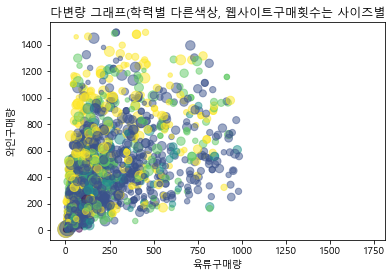

In [20]:
# x축: MntMeatProducts(육류구매량)
# y축: MntWines(와인구매량)
# c(컬러): Edu_level(학력)
# s(사이즈): NumWebPurchases(웹사이트구매횟수)

# 그래프 틀 생성
fig = plt.figure(figsize = (6, 4))
axes1 = fig.add_subplot(1,1,1)

# 산점도 다변량 그래프 그리기
axes1.scatter(x=df['MntMeatProducts'],
    y=df['MntWines'],
    c=df['Edu_level'],
    s=df['NumWebPurchases']*10,
    alpha=0.5
)

axes1.set_title('다변량 그래프(학력별 다른색상, 웹사이트구매횟수는 사이즈별')
axes1.set_xlabel('육류구매량')
axes1.set_ylabel('와인구매량')
plt.show()